# Predicitng if the Next candle is Bullish Or Bearish

In [2]:
df = pd.read_csv(r"shifted_data_for_classification.csv")
df = df.drop(columns=['long_short'])
df.set_index("date_time", inplace=True)
df.head(10)

,volume_true,volume_false,vdiff(false-true),original_volume,close_pct,long_short_shifted
date_time,,,,,,
2023-12-01 00:10:00,3.975477e+07,2.085109e+07,-1.890367e+07,0.00000,-0.135387,1.0
2023-12-01 00:15:00,3.312964e+07,1.213307e+07,-2.099657e+07,0.00000,0.018873,1.0
2023-12-01 00:20:00,3.119150e+06,6.429135e+06,3.309985e+06,0.00000,0.010365,0.0
2023-12-01 00:25:00,9.916539e+06,6.308933e+06,-3.607606e+06,25853.39390,-0.026575,1.0
2023-12-01 00:30:00,5.388690e+06,9.595557e+06,4.206867e+06,10497.55234,0.039341,1.0
2023-12-01 00:35:00,3.996835e+06,5.187152e+06,1.190317e+06,5896.87644,0.039591,1.0
2023-12-01 00:40:00,4.377176e+06,1.001015e+07,5.632970e+06,0.00000,0.014343,0.0
2023-12-01 00:45:00,5.919336e+06,2.201524e+06,-3.717813e+06,0.00000,-0.065861,1.0
2023-12-01 00:50:00,3.830813e+06,7.934668e+06,4.103855e+06,0.00000,0.131543,0.0


In [3]:
X = df.drop(columns=['long_short_shifted'])
y = df['long_short_shifted']
y = np.squeeze(y)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'df' is your DataFrame
# Data
X = df.drop(columns=['long_short_shifted'])
y = df['long_short_shifted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (not necessary for Random Forest, but won't hurt)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model with Cross-Validation
cv_scores = cross_val_score(best_rf_classifier, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Predict on the test set with the best model
y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluate the best model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Cross-Validation Scores: [0.51670804 0.50506015 0.51231621 0.49704029 0.51575329]
Mean CV Accuracy: 0.5093755967156769

Confusion Matrix:
[[1419 1821]
 [1381 1926]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.44      0.47      3240
         1.0       0.51      0.58      0.55      3307

    accuracy                           0.51      6547
   macro avg       0.51      0.51      0.51      6547
weighted avg       0.51      0.51      0.51      6547

Test Accuracy: 0.510921032533985


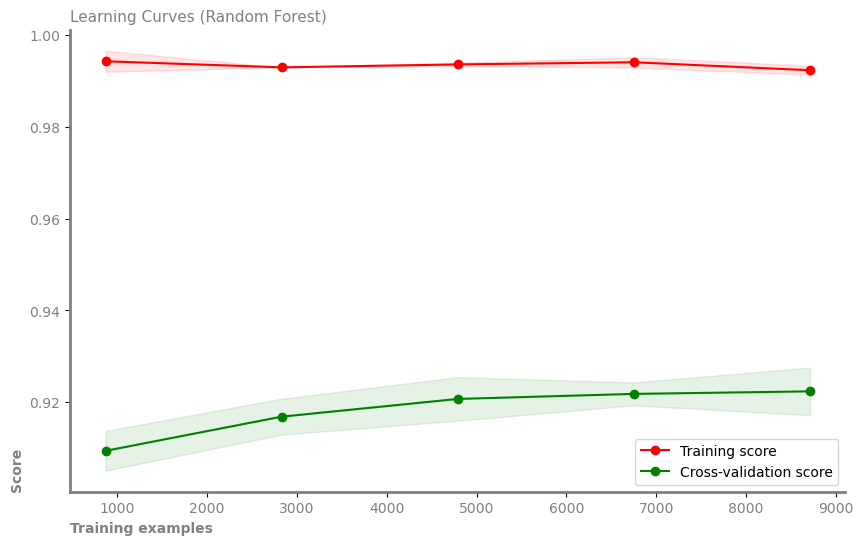

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

# Plot Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title, color='grey', loc='left', fontsize=11)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", color='grey', fontsize=10, fontweight='bold', loc='left')
    plt.ylabel("Score", color='grey', fontsize=10, fontweight='bold', loc='bottom')
    plt.xticks(color='grey')
    plt.yticks(color='grey')
    plt.gca().spines['bottom'].set_color('grey')
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_color('grey')
    plt.gca().spines['left'].set_linewidth(2)
    sns.despine()
    plt.grid(False)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
plot_learning_curve(best_random_forest_pipeline, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()